## generic

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_columns', None)

data = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/2015.csv")
data.head()

,FL_DATE,OP_CARRIER,OP_CARRIER_FL_NUM,ORIGIN,DEST,CRS_DEP_TIME,DEP_TIME,DEP_DELAY,TAXI_OUT,WHEELS_OFF,WHEELS_ON,TAXI_IN,CRS_ARR_TIME,ARR_TIME,ARR_DELAY,CANCELLED,CANCELLATION_CODE,DIVERTED,CRS_ELAPSED_TIME,ACTUAL_ELAPSED_TIME,AIR_TIME,DISTANCE,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY,Unnamed: 27
0,2015-01-01,NK,195,MCO,FLL,2147,2143.0,-4.0,15.0,2158.0,2238.0,7.0,2250,2245.0,-5.0,0.0,NaN,0.0,63.0,62.0,40.0,177.0,NaN,NaN,NaN,NaN,NaN,NaN
1,2015-01-01,NK,197,LGA,FLL,1050,1104.0,14.0,20.0,1124.0,1354.0,9.0,1404,1403.0,-1.0,0.0,NaN,0.0,194.0,179.0,150.0,1076.0,NaN,NaN,NaN,NaN,NaN,NaN
2,2015-01-01,NK,198,FLL,MCO,700,712.0,12.0,19.0,731.0,803.0,10.0,757,813.0,16.0,0.0,NaN,0.0,57.0,61.0,32.0,177.0,0.0,0.0,16.0,0.0,0.0,NaN
3,2015-01-01,NK,199,IAH,LAS,2240,2251.0,11.0,8.0,2259.0,2343.0,4.0,2356,2347.0,-9.0,0.0,NaN,0.0,196.0,176.0,164.0,1222.0,NaN,NaN,NaN,NaN,NaN,NaN
4,2015-01-01,NK,200,IAH,ORD,623,620.0,-3.0,15.0,635.0,830.0,10.0,855,840.0,-15.0,0.0,NaN,0.0,152.0,140.0,115.0,925.0,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
data.shape

(5819079, 28)

In [ ]:
data.columns # after take off features will not determine departure delay

Index(['FL_DATE', 'OP_CARRIER', 'OP_CARRIER_FL_NUM', 'ORIGIN', 'DEST',
       'CRS_DEP_TIME', 'DEP_TIME', 'DEP_DELAY', 'TAXI_OUT', 'WHEELS_OFF',
       'WHEELS_ON', 'TAXI_IN', 'CRS_ARR_TIME', 'ARR_TIME', 'ARR_DELAY',
       'CANCELLED', 'CANCELLATION_CODE', 'DIVERTED', 'CRS_ELAPSED_TIME',
       'ACTUAL_ELAPSED_TIME', 'AIR_TIME', 'DISTANCE', 'CARRIER_DELAY',
       'WEATHER_DELAY', 'NAS_DELAY', 'SECURITY_DELAY', 'LATE_AIRCRAFT_DELAY',
       'Unnamed: 27'],
      dtype='object')

In [ ]:
data.duplicated().sum()

0

In [ ]:
data.isna().sum() # delays could be replaced with 0, dep_time/arr_time can be dropped, at end, could maybe drop others
# check if dep_time and de_delay flights have arrival (and airtime actual elapsed, taxi, wheels)

FL_DATE                      0
OP_CARRIER                   0
OP_CARRIER_FL_NUM            0
ORIGIN                       0
DEST                         0
CRS_DEP_TIME                 0
DEP_TIME                 86153
DEP_DELAY                86153
TAXI_OUT                 89047
WHEELS_OFF               89047
WHEELS_ON                92513
TAXI_IN                  92513
CRS_ARR_TIME                 0
ARR_TIME                 92513
ARR_DELAY               105071
CANCELLED                    0
CANCELLATION_CODE      5729195
DIVERTED                     0
CRS_ELAPSED_TIME             6
ACTUAL_ELAPSED_TIME     105071
AIR_TIME                105071
DISTANCE                     0
CARRIER_DELAY          4755640
WEATHER_DELAY          4755640
NAS_DELAY              4755640
SECURITY_DELAY         4755640
LATE_AIRCRAFT_DELAY    4755640
Unnamed: 27            5819079
dtype: int64

In [ ]:
105071/5819079

0.018056293788071963

In [ ]:
data.drop(columns=['Unnamed: 27'], inplace=True)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5819079 entries, 0 to 5819078
Data columns (total 27 columns):
 #   Column               Dtype  
---  ------               -----  
 0   FL_DATE              object 
 1   OP_CARRIER           object 
 2   OP_CARRIER_FL_NUM    int64  
 3   ORIGIN               object 
 4   DEST                 object 
 5   CRS_DEP_TIME         int64  
 6   DEP_TIME             float64
 7   DEP_DELAY            float64
 8   TAXI_OUT             float64
 9   WHEELS_OFF           float64
 10  WHEELS_ON            float64
 11  TAXI_IN              float64
 12  CRS_ARR_TIME         int64  
 13  ARR_TIME             float64
 14  ARR_DELAY            float64
 15  CANCELLED            float64
 16  CANCELLATION_CODE    object 
 17  DIVERTED             float64
 18  CRS_ELAPSED_TIME     float64
 19  ACTUAL_ELAPSED_TIME  float64
 20  AIR_TIME             float64
 21  DISTANCE             float64
 22  CARRIER_DELAY        float64
 23  WEATHER_DELAY        float64
 24

## flight date

In [ ]:
data['FL_DATE'] = pd.to_datetime(data['FL_DATE'])


## carriers

In [ ]:
data['OP_CARRIER'].unique()

array(['NK', 'MQ', 'OO', 'EV', 'HA', 'UA', 'US', 'VX', 'WN', 'B6', 'F9',
       'AA', 'AS', 'DL'], dtype=object)

In [ ]:
airline_mapping = {
    'NK': 'Spirit Airlines',
    'MQ': 'Envoy Air',
    'OO': 'SkyWest Airlines',
    'EV': 'ExpressJet Airlines',
    'HA': 'Hawaiian Airlines',
    'UA': 'United Airlines',
    'US': 'US Airways (now part of American Airlines)',
    'VX': 'Virgin America (now part of Alaska Airlines)',
    'WN': 'Southwest Airlines',
    'B6': 'JetBlue Airways',
    'F9': 'Frontier Airlines',
    'AA': 'American Airlines',
    'AS': 'Alaska Airlines',
    'DL': 'Delta Air Lines'
}

# Replace airline codes with full names
data['OP_CARRIER'].replace(airline_mapping, inplace=True)
print(data.head())


     FL_DATE       OP_CARRIER  OP_CARRIER_FL_NUM ORIGIN DEST  CRS_DEP_TIME  \
0 2015-01-01  Spirit Airlines                195    MCO  FLL          2147   
1 2015-01-01  Spirit Airlines                197    LGA  FLL          1050   
2 2015-01-01  Spirit Airlines                198    FLL  MCO           700   
3 2015-01-01  Spirit Airlines                199    IAH  LAS          2240   
4 2015-01-01  Spirit Airlines                200    IAH  ORD           623   

   DEP_TIME  DEP_DELAY  TAXI_OUT  WHEELS_OFF  WHEELS_ON  TAXI_IN  \
0    2143.0       -4.0      15.0      2158.0     2238.0      7.0   
1    1104.0       14.0      20.0      1124.0     1354.0      9.0   
2     712.0       12.0      19.0       731.0      803.0     10.0   
3    2251.0       11.0       8.0      2259.0     2343.0      4.0   
4     620.0       -3.0      15.0       635.0      830.0     10.0   

   CRS_ARR_TIME  ARR_TIME  ARR_DELAY  CANCELLED CANCELLATION_CODE  DIVERTED  \
0          2250    2245.0       -5.0       

In [ ]:
data.OP_CARRIER.value_counts()

Southwest Airlines                              1261855
Delta Air Lines                                  875881
American Airlines                                725984
SkyWest Airlines                                 588353
ExpressJet Airlines                              571977
United Airlines                                  515723
Envoy Air                                        294632
JetBlue Airways                                  267048
US Airways (now part of American Airlines)       198715
Alaska Airlines                                  172521
Spirit Airlines                                  117379
Frontier Airlines                                 90836
Hawaiian Airlines                                 76272
Virgin America (now part of Alaska Airlines)      61903
Name: OP_CARRIER, dtype: int64

In [ ]:
data['OP_CARRIER_FL_NUM'] = data['OP_CARRIER_FL_NUM'].astype(str)

## origin and dest

In [ ]:
len(data['ORIGIN'].unique())

322

In [ ]:
len(data['DEST'].unique())

322

In [ ]:
set(data['DEST'].unique()) == set(data['ORIGIN'].unique())

True

##cancellations (null in crs elapsed)- could be another question

In [ ]:
data.CANCELLED.value_counts()

0.0    5729195
1.0      89884
Name: CANCELLED, dtype: int64

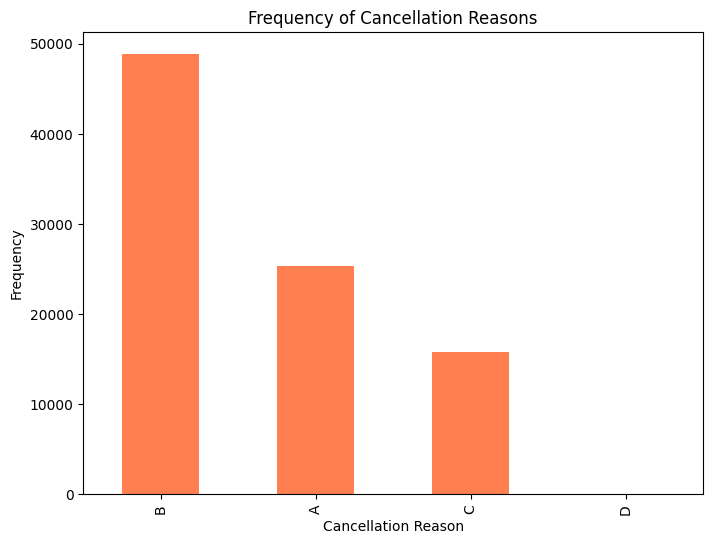

In [ ]:
plt.figure(figsize=(8, 6))
data['CANCELLATION_CODE'].value_counts().plot(kind='bar', color='coral')
plt.xlabel('Cancellation Reason')
plt.ylabel('Frequency')
plt.title('Frequency of Cancellation Reasons')
plt.show()


In [ ]:
data['CANCELLATION_CODE'].unique()

array([nan, 'A', 'B', 'C', 'D'], dtype=object)

In [ ]:
cancelled_flights_num = data['CANCELLED'].sum()
cancelled = data[(data['CANCELLED'] == 1)]
cancelled

,FL_DATE,OP_CARRIER,OP_CARRIER_FL_NUM,ORIGIN,DEST,CRS_DEP_TIME,DEP_TIME,DEP_DELAY,TAXI_OUT,WHEELS_OFF,WHEELS_ON,TAXI_IN,CRS_ARR_TIME,ARR_TIME,ARR_DELAY,CANCELLED,CANCELLATION_CODE,DIVERTED,CRS_ELAPSED_TIME,ACTUAL_ELAPSED_TIME,AIR_TIME,DISTANCE,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY
17,2015-01-01,Spirit Airlines,596,FLL,MSP,2131,NaN,NaN,NaN,NaN,NaN,NaN,19,NaN,NaN,1.0,A,0.0,228.0,NaN,NaN,1487.0,NaN,NaN,NaN,NaN,NaN
37,2015-01-01,Spirit Airlines,144,ATL,DFW,1124,NaN,NaN,NaN,NaN,NaN,NaN,1252,NaN,NaN,1.0,B,0.0,148.0,NaN,NaN,731.0,NaN,NaN,NaN,NaN,NaN
42,2015-01-01,Spirit Airlines,163,DFW,ATL,731,NaN,NaN,NaN,NaN,NaN,NaN,1032,NaN,NaN,1.0,B,0.0,121.0,NaN,NaN,731.0,NaN,NaN,NaN,NaN,NaN
84,2015-01-01,Spirit Airlines,634,TPA,DTW,1230,NaN,NaN,NaN,NaN,NaN,NaN,1506,NaN,NaN,1.0,B,0.0,156.0,NaN,NaN,983.0,NaN,NaN,NaN,NaN,NaN
196,2015-01-01,Spirit Airlines,812,DFW,TPA,818,NaN,NaN,NaN,NaN,NaN,NaN,1134,NaN,NaN,1.0,B,0.0,136.0,NaN,NaN,929.0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5818124,2015-12-31,ExpressJet Airlines,4555,IAH,BRO,900,NaN,NaN,NaN,NaN,NaN,NaN,1020,NaN,NaN,1.0,B,0.0,80.0,NaN,NaN,308.0,NaN,NaN,NaN,NaN,NaN
5818270,2015-12-31,ExpressJet Airlines,5062,VLD,ATL,615,NaN,NaN,NaN,NaN,NaN,NaN,718,NaN,NaN,1.0,B,0.0,63.0,NaN,NaN,208.0,NaN,NaN,NaN,NaN,NaN
5818364,2015-12-31,ExpressJet Airlines,5131,CAE,ATL,730,NaN,NaN,NaN,NaN,NaN,NaN,843,NaN,NaN,1.0,B,0.0,73.0,NaN,NaN,192.0,NaN,NaN,NaN,NaN,NaN
5818511,2015-12-31,ExpressJet Airlines,5579,ABE,ATL,600,NaN,NaN,NaN,NaN,NaN,NaN,813,NaN,NaN,1.0,B,0.0,133.0,NaN,NaN,692.0,NaN,NaN,NaN,NaN,NaN


In [ ]:
# Filter rows where flight is not cancelled
not_cancelled_data = data[data['CANCELLED'] == 0]

# Check if 'CANCELLATION_CODE' is NaN for all rows where flight is not cancelled
all_nan = not_cancelled_data['CANCELLATION_CODE'].isna().all()

if all_nan:
    print("For all rows where flight is not cancelled, 'CANCELLATION_CODE' is NaN.")
else:
    print("For some rows where flight is not cancelled, 'CANCELLATION_CODE' is not NaN.")


For all rows where flight is not cancelled, 'CANCELLATION_CODE' is NaN.


In [ ]:
cancelled.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 89884 entries, 17 to 5818522
Data columns (total 27 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   FL_DATE              89884 non-null  datetime64[ns]
 1   OP_CARRIER           89884 non-null  object        
 2   OP_CARRIER_FL_NUM    89884 non-null  object        
 3   ORIGIN               89884 non-null  object        
 4   DEST                 89884 non-null  object        
 5   CRS_DEP_TIME         89884 non-null  int64         
 6   DEP_TIME             3731 non-null   float64       
 7   DEP_DELAY            3731 non-null   float64       
 8   TAXI_OUT             837 non-null    float64       
 9   WHEELS_OFF           837 non-null    float64       
 10  WHEELS_ON            0 non-null      float64       
 11  TAXI_IN              0 non-null      float64       
 12  CRS_ARR_TIME         89884 non-null  int64         
 13  ARR_TIME             0 non-n

In [ ]:
len(set(cancelled['DEP_TIME'].unique()))

1098

In [ ]:
columns_to_check = ['DEP_TIME', 'DEP_DELAY', 'TAXI_OUT', 'WHEELS_OFF', 'WHEELS_ON',
                    'TAXI_IN', 'ARR_TIME', 'ARR_DELAY', 'ACTUAL_ELAPSED_TIME', 'AIR_TIME',
                    'CARRIER_DELAY', 'WEATHER_DELAY', 'NAS_DELAY', 'SECURITY_DELAY', 'LATE_AIRCRAFT_DELAY']

# Check if specified columns are not all NaN for all rows where flight is cancelled
nn = cancelled[columns_to_check].notna().any()

if nn.any():
    columns_with_values = not_all_nan[not_all_nan == True].index.tolist()
    print("The following columns have at least one non-NaN value for all rows where the flight is cancelled:")
    print(columns_with_values)
else:
    print("All specified columns have NaN values for all rows where the flight is cancelled.")


The following columns have at least one non-NaN value for all rows where the flight is cancelled:
['DEP_TIME', 'DEP_DELAY', 'TAXI_OUT', 'WHEELS_OFF']


In [ ]:
columns_to_check = ['TAXI_OUT', 'WHEELS_OFF']

# Check if specified columns are not null in the same row for cancelled flights
nn = cancelled[columns_to_check].notnull().all(axis=1)

if nn.any():
    print("There are rows where the following columns are not null in the same row for cancelled flights:")
    print(cancelled.loc[not_null_same_row, columns_to_check])
else:
    print("For all rows where the flight is cancelled, the specified columns are null in the same row.")


There are rows where the following columns are not null in the same row for cancelled flights:
         TAXI_OUT  WHEELS_OFF
7379         12.0      1640.0
7645         20.0      1149.0
7725         13.0      1550.0
19037        27.0      1913.0
32081        18.0       841.0
...           ...         ...
5797974      16.0       913.0
5798083      15.0      2251.0
5802823       9.0      2254.0
5806247      15.0      2011.0
5806630      13.0      1620.0

[837 rows x 2 columns]


In [ ]:
columns_to_check = ['DEP_TIME', 'DEP_DELAY', 'TAXI_OUT', 'WHEELS_OFF', 'WHEELS_ON',
                    'TAXI_IN', 'ARR_TIME', 'ARR_DELAY', 'ACTUAL_ELAPSED_TIME', 'AIR_TIME',
                    'CARRIER_DELAY', 'WEATHER_DELAY', 'NAS_DELAY', 'SECURITY_DELAY', 'LATE_AIRCRAFT_DELAY']

cancelled = cancelled.drop(columns = columns_to_check)

print(cancelled)

           FL_DATE           OP_CARRIER OP_CARRIER_FL_NUM ORIGIN DEST  \
17      2015-01-01      Spirit Airlines               596    FLL  MSP   
37      2015-01-01      Spirit Airlines               144    ATL  DFW   
42      2015-01-01      Spirit Airlines               163    DFW  ATL   
84      2015-01-01      Spirit Airlines               634    TPA  DTW   
196     2015-01-01      Spirit Airlines               812    DFW  TPA   
...            ...                  ...               ...    ...  ...   
5818124 2015-12-31  ExpressJet Airlines              4555    IAH  BRO   
5818270 2015-12-31  ExpressJet Airlines              5062    VLD  ATL   
5818364 2015-12-31  ExpressJet Airlines              5131    CAE  ATL   
5818511 2015-12-31  ExpressJet Airlines              5579    ABE  ATL   
5818522 2015-12-31  ExpressJet Airlines              6021    ABE  ORD   

         CRS_DEP_TIME  CRS_ARR_TIME  CANCELLED CANCELLATION_CODE  DIVERTED  \
17               2131            19        1.

In [ ]:
cancelled.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 89884 entries, 17 to 5818522
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   FL_DATE            89884 non-null  datetime64[ns]
 1   OP_CARRIER         89884 non-null  object        
 2   OP_CARRIER_FL_NUM  89884 non-null  object        
 3   ORIGIN             89884 non-null  object        
 4   DEST               89884 non-null  object        
 5   CRS_DEP_TIME       89884 non-null  int64         
 6   CRS_ARR_TIME       89884 non-null  int64         
 7   CANCELLED          89884 non-null  float64       
 8   CANCELLATION_CODE  89884 non-null  object        
 9   DIVERTED           89884 non-null  float64       
 10  CRS_ELAPSED_TIME   89879 non-null  float64       
 11  DISTANCE           89884 non-null  float64       
dtypes: datetime64[ns](1), float64(4), int64(2), object(5)
memory usage: 8.9+ MB


In [ ]:
data = data[data['CANCELLED'] == 0]

In [ ]:
data.drop(columns=['CANCELLED',   'CANCELLATION_CODE'], inplace=True)

## diverted = delayed?

In [ ]:
data.DIVERTED.value_counts()

0.0    5714008
1.0      15187
Name: DIVERTED, dtype: int64

In [ ]:
diverted = data[data['DIVERTED']==1]
diverted

,FL_DATE,OP_CARRIER,OP_CARRIER_FL_NUM,ORIGIN,DEST,CRS_DEP_TIME,DEP_TIME,DEP_DELAY,TAXI_OUT,WHEELS_OFF,WHEELS_ON,TAXI_IN,CRS_ARR_TIME,ARR_TIME,ARR_DELAY,DIVERTED,CRS_ELAPSED_TIME,ACTUAL_ELAPSED_TIME,AIR_TIME,DISTANCE,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY
756,2015-01-01,SkyWest Airlines,4506,SLC,SUN,1110,1108.0,-2.0,33.0,1141.0,1349.0,4.0,1225,1353.0,NaN,1.0,75.0,NaN,NaN,222.0,NaN,NaN,NaN,NaN,NaN
929,2015-01-01,SkyWest Airlines,5165,DEN,BZN,1715,1744.0,29.0,25.0,1809.0,2202.0,4.0,1908,2206.0,NaN,1.0,113.0,NaN,NaN,524.0,NaN,NaN,NaN,NaN,NaN
975,2015-01-01,SkyWest Airlines,5203,LAX,ASE,1816,1840.0,24.0,22.0,1902.0,NaN,NaN,2124,NaN,NaN,1.0,128.0,NaN,NaN,737.0,NaN,NaN,NaN,NaN,NaN
1046,2015-01-01,SkyWest Airlines,5237,MKE,IAH,745,742.0,-3.0,15.0,757.0,1456.0,9.0,1041,1505.0,NaN,1.0,176.0,NaN,NaN,984.0,NaN,NaN,NaN,NaN,NaN
1182,2015-01-01,SkyWest Airlines,5488,IAH,ASE,1427,1436.0,9.0,19.0,1455.0,NaN,NaN,1619,NaN,NaN,1.0,172.0,NaN,NaN,913.0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5816552,2015-12-31,ExpressJet Airlines,2749,DFW,BRO,1155,1209.0,14.0,22.0,1231.0,NaN,NaN,1330,NaN,NaN,1.0,95.0,NaN,NaN,482.0,NaN,NaN,NaN,NaN,NaN
5817576,2015-12-31,Delta Air Lines,2566,SFO,MSP,620,618.0,-2.0,21.0,639.0,2000.0,5.0,1157,2005.0,NaN,1.0,217.0,NaN,NaN,1589.0,NaN,NaN,NaN,NaN,NaN
5817695,2015-12-31,ExpressJet Airlines,2785,DFW,BRO,1530,1555.0,25.0,14.0,1609.0,NaN,NaN,1720,NaN,NaN,1.0,110.0,NaN,NaN,482.0,NaN,NaN,NaN,NaN,NaN
5818265,2015-12-31,ExpressJet Airlines,5059,ATL,GNV,1327,1348.0,21.0,42.0,1430.0,2321.0,7.0,1438,2328.0,NaN,1.0,71.0,NaN,NaN,300.0,NaN,NaN,NaN,NaN,NaN


In [ ]:
diverted.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15187 entries, 756 to 5819077
Data columns (total 25 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   FL_DATE              15187 non-null  datetime64[ns]
 1   OP_CARRIER           15187 non-null  object        
 2   OP_CARRIER_FL_NUM    15187 non-null  object        
 3   ORIGIN               15187 non-null  object        
 4   DEST                 15187 non-null  object        
 5   CRS_DEP_TIME         15187 non-null  int64         
 6   DEP_TIME             15187 non-null  float64       
 7   DEP_DELAY            15187 non-null  float64       
 8   TAXI_OUT             15187 non-null  float64       
 9   WHEELS_OFF           15187 non-null  float64       
 10  WHEELS_ON            12558 non-null  float64       
 11  TAXI_IN              12558 non-null  float64       
 12  CRS_ARR_TIME         15187 non-null  int64         
 13  ARR_TIME             12558 

In [ ]:
# should be dropped or used if only dep delay is considered but arrival time etc is unknown

## departure times

In [ ]:
data['CRS_DEP_TIME'] = pd.to_datetime(data['CRS_DEP_TIME'].astype(str).str.zfill(4), format='%H%M').dt.time


In [ ]:
data['CRS_ARR_TIME'] = data['CRS_ARR_TIME'].replace(2400, 0)
data['CRS_ARR_TIME'] = pd.to_datetime(data['CRS_ARR_TIME'].astype(str).str.zfill(4), format='%H%M').dt.time


In [ ]:
data['DEP_TIME'] = data['DEP_TIME'].astype(int)
data['ARR_TIME'] = data['ARR_TIME'].astype(int)


data['DEP_TIME'] = data['DEP_TIME'].replace(2400, 0)
data['DEP_TIME'] = pd.to_datetime(data['DEP_TIME'].astype(str).str.zfill(4), format='%H%M').dt.time


data['ARR_TIME'] = data['ARR_TIME'].replace(2400, 0)
data['ARR_TIME'] = pd.to_datetime(data['ARR_TIME'].astype(str).str.zfill(4), format='%H%M').dt.time


IntCastingNaNError: Cannot convert non-finite values (NA or inf) to integer

If schedule departure at 0h05, but then the departure time says 23h50.Is there a 23 hour and 45 minute delay? or did the flight leave 15 minutes earlier?

## arrival

According to The Economist, the global average for flight delays is 27 minutes. This means that if an airline wants to reduce their flight delay timings so as to increase customers’ satisfaction and improve its competitive, it is essential for them to reduce their flight delays to less than the industry standards of 27 minutes

In [ ]:
unequal_diff = data[(data['ARR_TIME'] - data['CRS_ARR_TIME']) != data['ARR_DELAY']]
unequal_diff

,FL_DATE,OP_CARRIER,OP_CARRIER_FL_NUM,ORIGIN,DEST,CRS_DEP_TIME,DEP_TIME,DEP_DELAY,TAXI_OUT,WHEELS_OFF,WHEELS_ON,TAXI_IN,CRS_ARR_TIME,ARR_TIME,ARR_DELAY,DIVERTED,CRS_ELAPSED_TIME,ACTUAL_ELAPSED_TIME,AIR_TIME,DISTANCE,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY
2,2015-01-01,Spirit Airlines,198,FLL,MCO,07:00:00,712.0,12.0,19.0,731.0,803.0,10.0,757,813.0,16.0,0.0,57.0,61.0,32.0,177.0,0.0,0.0,16.0,0.0,0.0
9,2015-01-01,Spirit Airlines,209,ORD,OAK,15:34:00,1534.0,0.0,11.0,1545.0,1736.0,6.0,1819,1742.0,-37.0,0.0,285.0,248.0,231.0,1836.0,NaN,NaN,NaN,NaN,NaN
13,2015-01-01,Spirit Airlines,216,LAX,IAH,16:48:00,1641.0,-7.0,27.0,1708.0,2159.0,10.0,2155,2209.0,14.0,0.0,187.0,208.0,171.0,1379.0,NaN,NaN,NaN,NaN,NaN
14,2015-01-01,Spirit Airlines,217,IAH,LAX,14:24:00,1423.0,-1.0,11.0,1434.0,1541.0,10.0,1603,1551.0,-12.0,0.0,219.0,208.0,187.0,1379.0,NaN,NaN,NaN,NaN,NaN
18,2015-01-01,Spirit Airlines,597,MSP,FLL,01:15:00,127.0,12.0,14.0,141.0,527.0,40.0,542,607.0,25.0,0.0,207.0,220.0,166.0,1487.0,0.0,0.0,25.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5819069,2015-12-31,Envoy Air,3052,DFW,FSM,11:54:00,1153.0,-1.0,11.0,1204.0,1239.0,4.0,1300,1243.0,-17.0,0.0,66.0,50.0,35.0,227.0,NaN,NaN,NaN,NaN,NaN
5819075,2015-12-31,Envoy Air,3059,DFW,LCH,12:10:00,1338.0,88.0,12.0,1350.0,1443.0,3.0,1328,1446.0,78.0,0.0,78.0,68.0,53.0,295.0,68.0,0.0,0.0,0.0,10.0
5819076,2015-12-31,Envoy Air,3059,LCH,DFW,13:58:00,1510.0,72.0,12.0,1522.0,1615.0,14.0,1520,1629.0,69.0,0.0,82.0,79.0,53.0,295.0,0.0,0.0,0.0,0.0,69.0
5819077,2015-12-31,Envoy Air,3060,DFW,FAR,18:30:00,1840.0,10.0,12.0,1852.0,2247.0,3.0,2113,2250.0,NaN,1.0,163.0,NaN,NaN,968.0,NaN,NaN,NaN,NaN,NaN


In [ ]:
data['ARR_DELAY']

0          -5.0
1          -1.0
2          16.0
3          -9.0
4         -15.0
           ... 
5819074    10.0
5819075    78.0
5819076    69.0
5819077     NaN
5819078    82.0
Name: ARR_DELAY, Length: 5729195, dtype: float64

In [ ]:
arrival_delayed = data[data['ARR_DELAY']>0]
arrival_delayed

,FL_DATE,OP_CARRIER,OP_CARRIER_FL_NUM,ORIGIN,DEST,CRS_DEP_TIME,DEP_TIME,DEP_DELAY,TAXI_OUT,WHEELS_OFF,WHEELS_ON,TAXI_IN,CRS_ARR_TIME,ARR_TIME,ARR_DELAY,DIVERTED,CRS_ELAPSED_TIME,ACTUAL_ELAPSED_TIME,AIR_TIME,DISTANCE,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY
2,2015-01-01,Spirit Airlines,198,FLL,MCO,700,712.0,12.0,19.0,731.0,803.0,10.0,757,813.0,16.0,0.0,57.0,61.0,32.0,177.0,0.0,0.0,16.0,0.0,0.0
5,2015-01-01,Spirit Airlines,201,FLL,STT,1253,1258.0,5.0,24.0,1322.0,1634.0,10.0,1630,1644.0,14.0,0.0,157.0,166.0,132.0,1107.0,NaN,NaN,NaN,NaN,NaN
12,2015-01-01,Spirit Airlines,215,PHL,DFW,2059,2051.0,-8.0,23.0,2114.0,2350.0,6.0,2352,2356.0,4.0,0.0,233.0,245.0,216.0,1303.0,NaN,NaN,NaN,NaN,NaN
13,2015-01-01,Spirit Airlines,216,LAX,IAH,1648,1641.0,-7.0,27.0,1708.0,2159.0,10.0,2155,2209.0,14.0,0.0,187.0,208.0,171.0,1379.0,NaN,NaN,NaN,NaN,NaN
15,2015-01-01,Spirit Airlines,218,FLL,ACY,800,815.0,15.0,12.0,827.0,1037.0,6.0,1025,1043.0,18.0,0.0,145.0,148.0,130.0,977.0,0.0,0.0,18.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5819071,2015-12-31,Envoy Air,3054,DFW,MOB,2020,2020.0,0.0,31.0,2051.0,2205.0,3.0,2200,2208.0,8.0,0.0,100.0,108.0,74.0,539.0,NaN,NaN,NaN,NaN,NaN
5819074,2015-12-31,Envoy Air,3058,ORD,ABQ,1015,1015.0,0.0,23.0,1038.0,1228.0,4.0,1222,1232.0,10.0,0.0,187.0,197.0,170.0,1118.0,NaN,NaN,NaN,NaN,NaN
5819075,2015-12-31,Envoy Air,3059,DFW,LCH,1210,1338.0,88.0,12.0,1350.0,1443.0,3.0,1328,1446.0,78.0,0.0,78.0,68.0,53.0,295.0,68.0,0.0,0.0,0.0,10.0
5819076,2015-12-31,Envoy Air,3059,LCH,DFW,1358,1510.0,72.0,12.0,1522.0,1615.0,14.0,1520,1629.0,69.0,0.0,82.0,79.0,53.0,295.0,0.0,0.0,0.0,0.0,69.0


In [ ]:
arrival_delayed['ARR_DELAY'].describe()

count    2.086896e+06
mean     3.311299e+01
std      5.294251e+01
min      1.000000e+00
25%      6.000000e+00
50%      1.500000e+01
75%      3.800000e+01
max      1.971000e+03
Name: ARR_DELAY, dtype: float64

In [ ]:
data['DEP_DELAY'] = data['DEP_DELAY'].astype(int)

IntCastingNaNError: Cannot convert non-finite values (NA or inf) to integer

## delays

In [ ]:
data[data['DEP_DELAY']>0].shape

(2123078, 25)

In [ ]:
data["DEP_DELAY"] = data["DEP_DELAY"].fillna(0)

In [ ]:
data['CARRIER_DELAY']

array([      nan, 0.000e+00, 1.000e+00, ..., 8.790e+02, 1.185e+03,
       1.636e+03])

In [ ]:
# Number of rows where at least one delay column has a value greater than 0
dd = ((data['CARRIER_DELAY'] > 0) |
                       (data['WEATHER_DELAY'] > 0) |
                       (data['NAS_DELAY'] > 0) |
                       (data['SECURITY_DELAY'] > 0) |
                       (data['LATE_AIRCRAFT_DELAY'] > 0)).sum()


if dd == 2123078:
    print("The number of rows where at least one delay column has a value greater than 0 is equal to 2,123,078.")
else:
    print("The number of rows does not match 2,123,078. It is", num_rows_with_delay)


The number of rows does not match 2,123,078. It is 1063439


## nulls

In [ ]:
missing_values = data.isna().sum()
sns.heatmap(data.isnull(), cmap='viridis')
plt.title('Missing Data Heatmap')
plt.show()


In [ ]:
print('Number of total missing values:', data.isna().sum().sum())

In [ ]:
data_NaN = data.loc[data.isnull().any(axis=1)]
percentage_NaN = (len(data_NaN)*100)/len(data)
print('Percentage of rows with at least 1 NaN value:', percentage_NaN)

Percentage of rows with at least 1 NaN value: 81.43824743266724


In [ ]:
data.drop(columns=['ARR_TIME'], inplace=True)

In [ ]:
data.drop(columns=['DEP_TIME'], inplace=True)

In [ ]:
data['TAXI_IN'].fillna((data['TAXI_IN'].mean()), inplace=True)
data_NaN['TAXI_IN'].fillna((data_NaN['TAXI_IN'].mean()), inplace=True)

<ipython-input-31-0b076519567d>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_NaN['TAXI_IN'].fillna((data_NaN['TAXI_IN'].mean()), inplace=True)


In [ ]:
# but TAXI_OUT, WHEELS_OFF, WHEELS_ON, and TAXI_ON can be dropped

## EDA

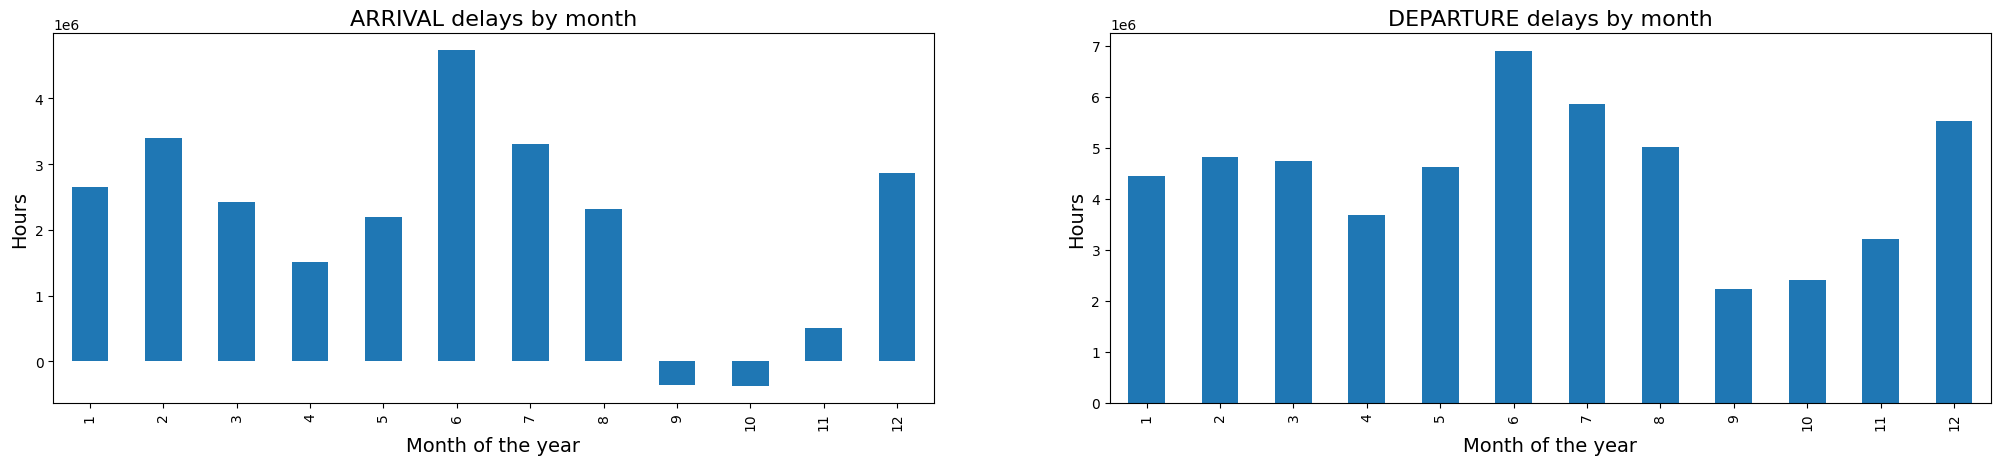

In [ ]:
month = data.FL_DATE.dt.month
plt.figure(figsize=(25, 12)).subplots_adjust(hspace = 0.5)

plt.subplot(2, 2 ,1)
data.groupby(month).ARR_DELAY.sum().plot.bar().set_title('ARRIVAL delays by month')
plt.title('ARRIVAL delays by month', fontsize=16)
plt.ylabel('Hours', fontsize=14)
plt.xlabel('Month of the year', fontsize=14)

plt.subplot(2, 2 ,2)
data.groupby(month).DEP_DELAY.sum().plot.bar()
plt.title('DEPARTURE delays by month', fontsize=16)
plt.ylabel('Hours', fontsize=14)
plt.xlabel('Month of the year', fontsize=14)

plt.show()

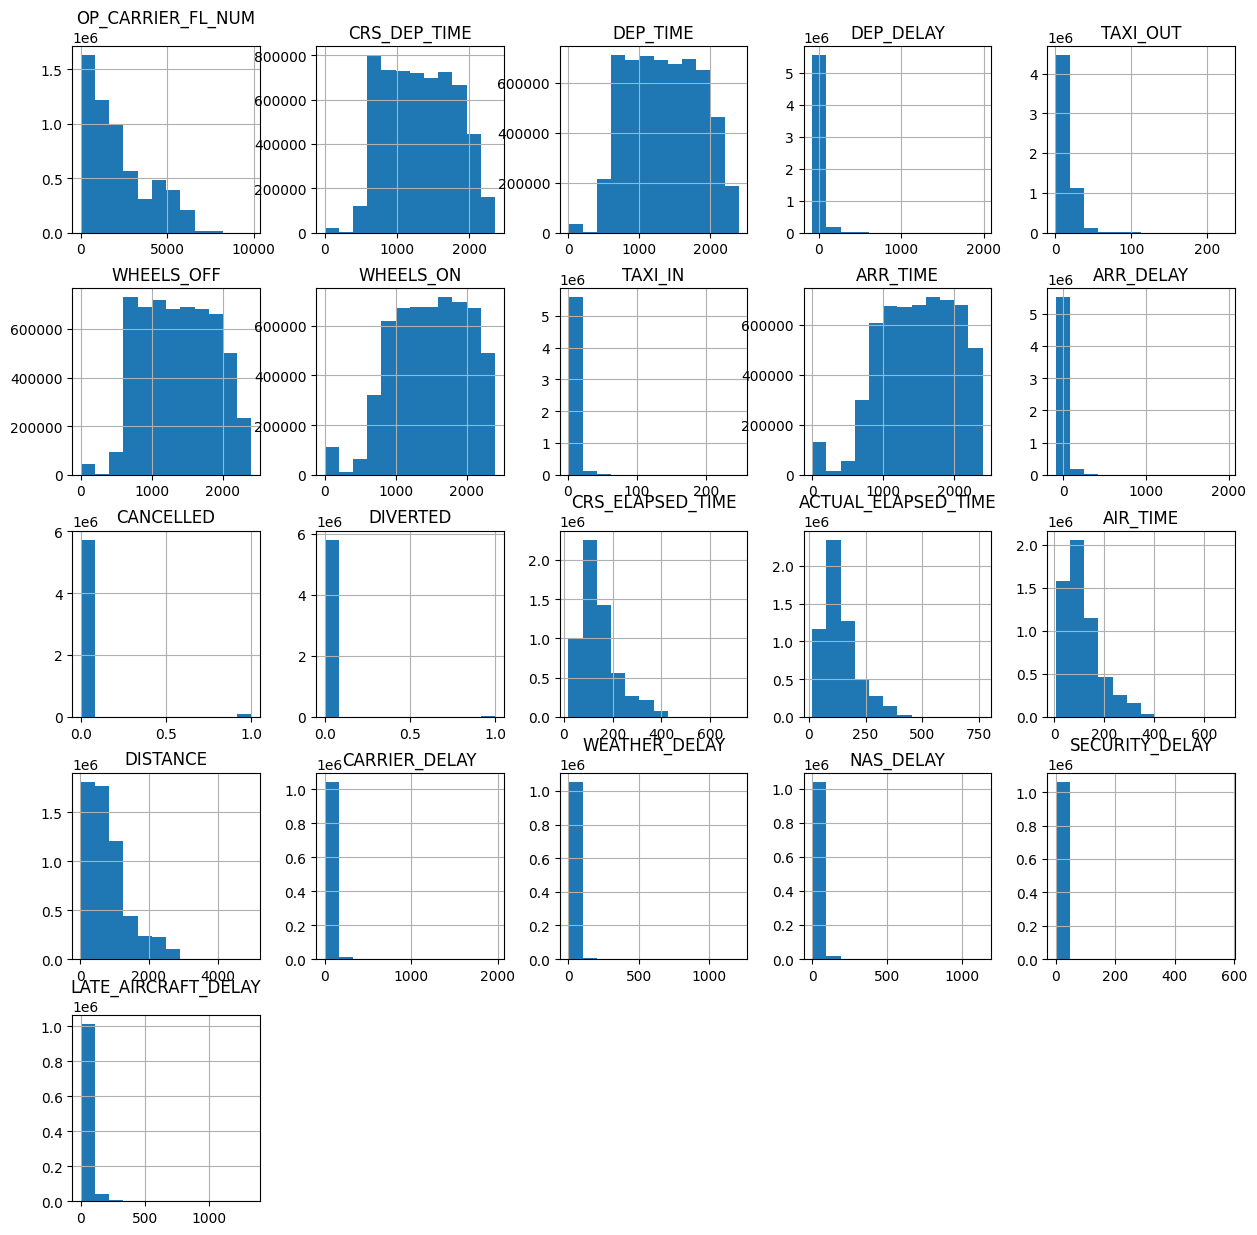

In [ ]:
data.hist(figsize  = [20, 20],bins=12)
plt.show()

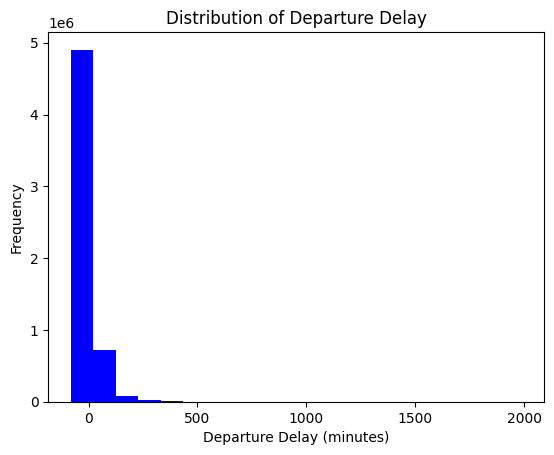

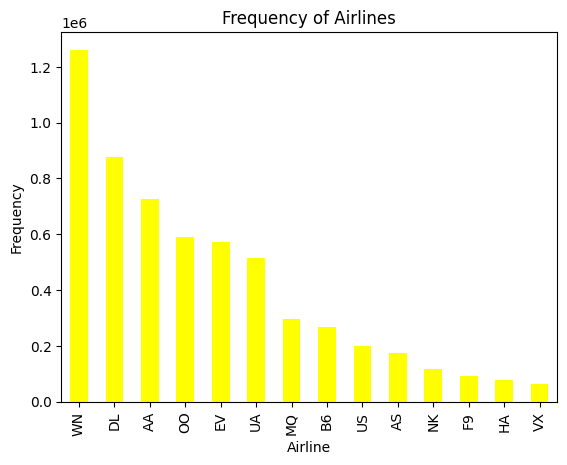

In [ ]:
# Histogram for departure delay
plt.hist(data['DEP_DELAY'], bins=20, color='blue')
plt.xlabel('Departure Delay (minutes)')
plt.ylabel('Frequency')
plt.title('Distribution of Departure Delay')
plt.show()

# Bar chart for airline frequencies
data['OP_CARRIER'].value_counts().plot(kind='bar', color='yellow')
plt.xlabel('Airline')
plt.ylabel('Frequency')
plt.title('Frequency of Airlines')
plt.show()


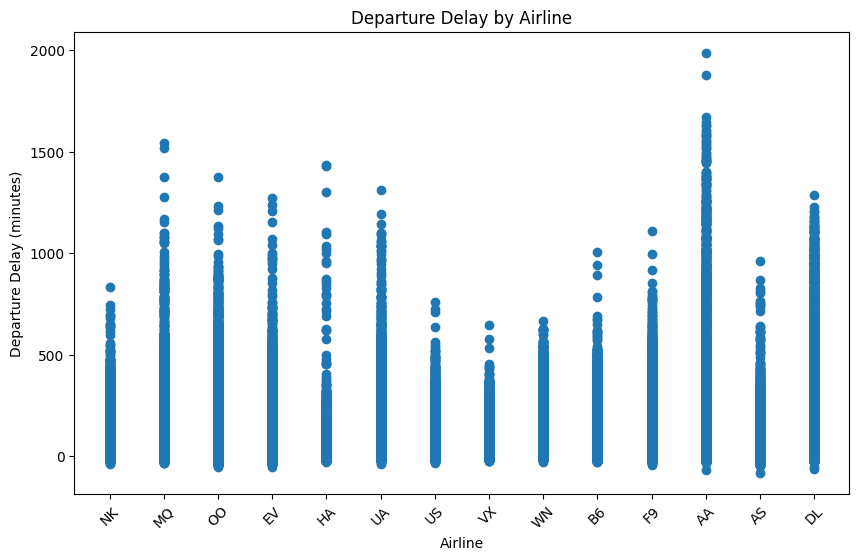

In [ ]:
# Compare departure delays of different airlines
plt.figure(figsize=(10, 6))
plt.scatter(x='OP_CARRIER', y='DEP_DELAY', data=data)
plt.xlabel('Airline')
plt.ylabel('Departure Delay (minutes)')
plt.title('Departure Delay by Airline')
plt.xticks(rotation=45)
plt.show()


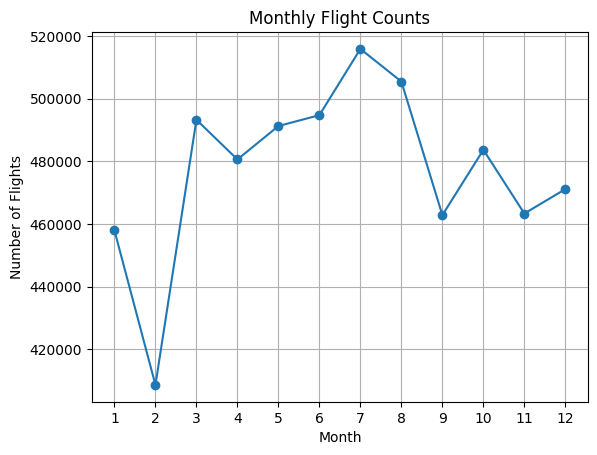

In [ ]:
month = data['FL_DATE'].dt.month

monthly_counts = month.value_counts().sort_index()
plt.plot(monthly_counts.index, monthly_counts.values, marker='o', linestyle='-')
plt.xlabel('Month')
plt.ylabel('Number of Flights')
plt.title('Monthly Flight Counts')
plt.xticks(range(1, 13))
plt.grid(True)
plt.show()

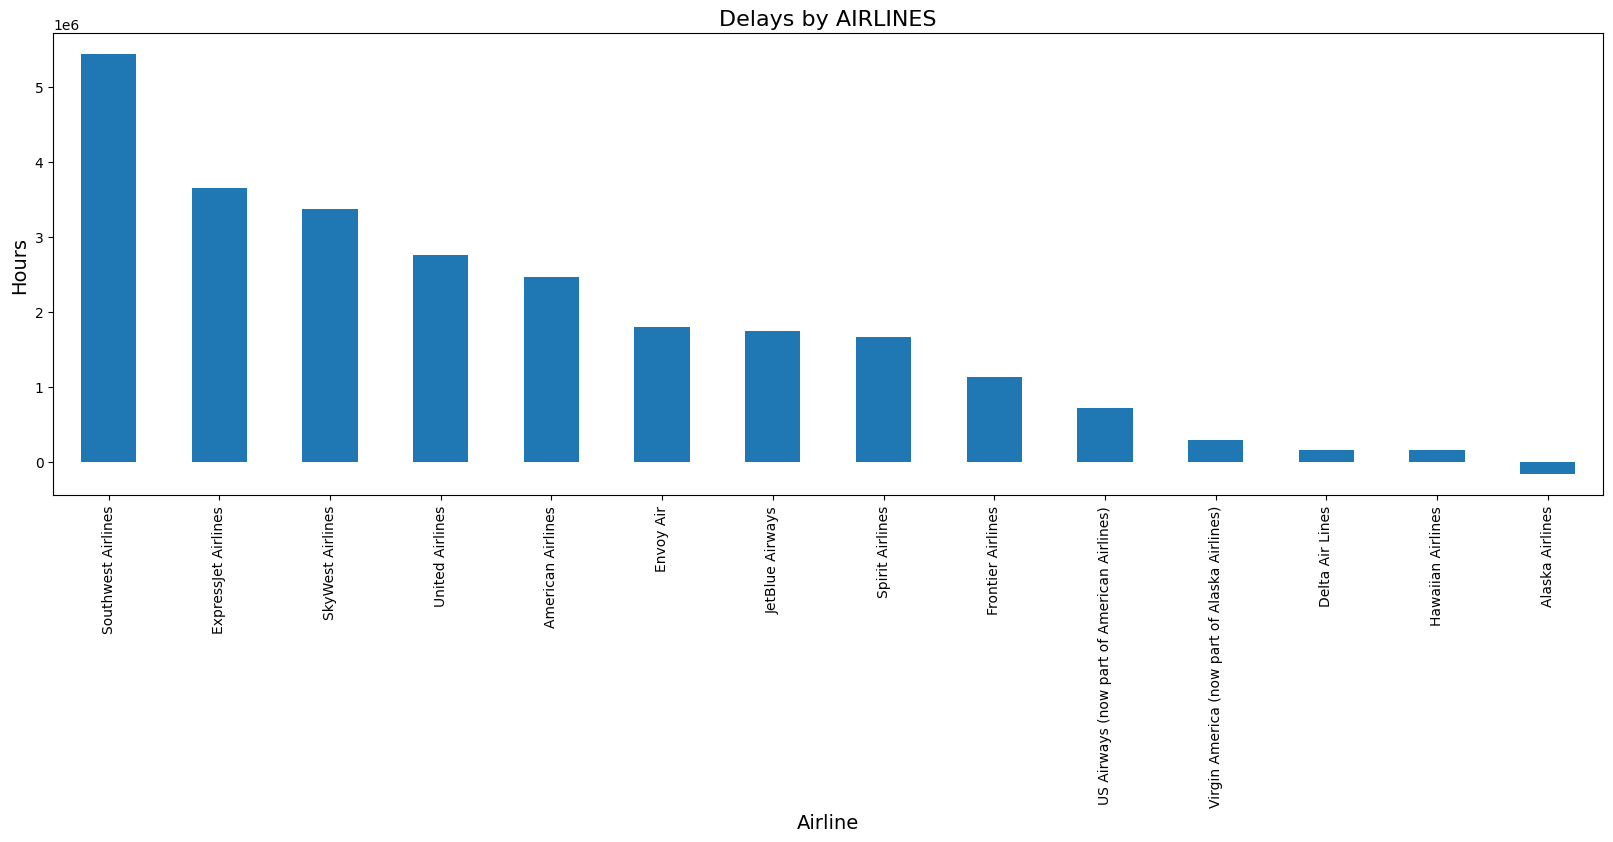

In [ ]:
plt.figure(figsize=(20, 6))
data.groupby('OP_CARRIER').ARR_DELAY.sum().sort_values(ascending=False).plot.bar()
plt.title(' ARR Delays by AIRLINES', fontsize=16)
plt.xlabel('Airline', fontsize=14)
plt.ylabel('Hours', fontsize=14)
plt.show()

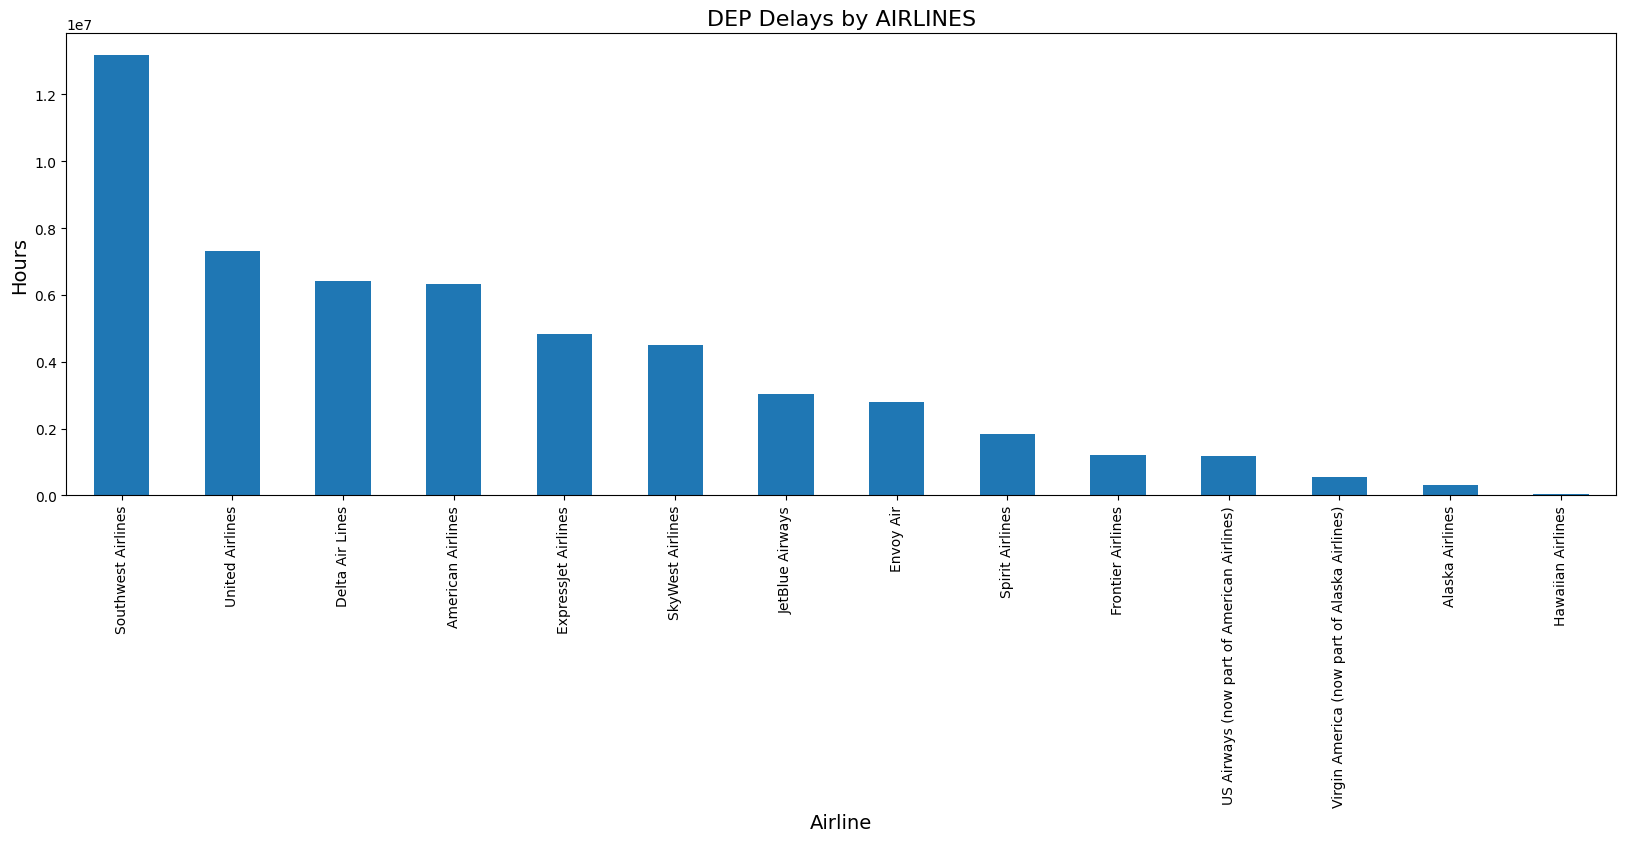

In [ ]:
plt.figure(figsize=(20, 6))
data.groupby('OP_CARRIER').DEP_DELAY.sum().sort_values(ascending=False).plot.bar()
plt.title('DEP Delays by AIRLINES', fontsize=16)
plt.xlabel('Airline', fontsize=14)
plt.ylabel('Hours', fontsize=14)
plt.show()

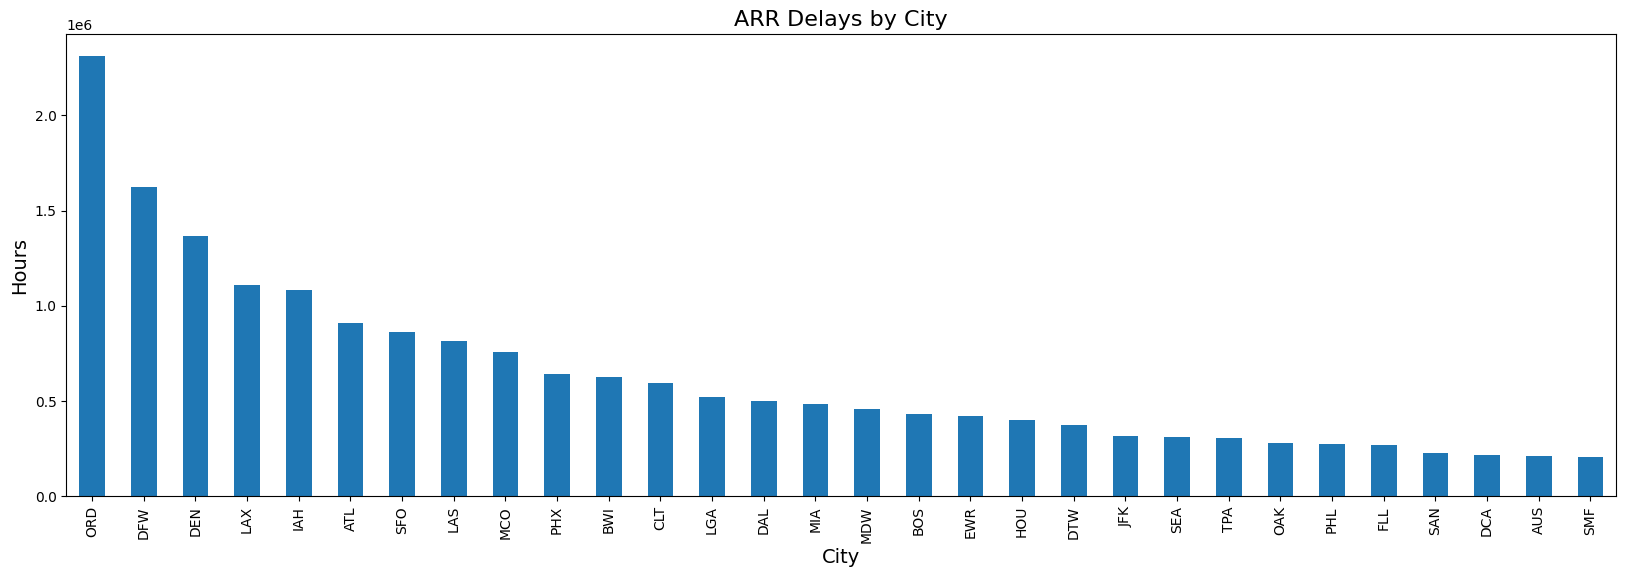

In [ ]:
city_by_delay = data.groupby('ORIGIN').ARR_DELAY.sum().sort_values(ascending=False)
plt.figure(figsize=(20, 6))
city_by_delay[:30].plot.bar()
plt.title('ARR Delays by City', fontsize=16)
plt.xlabel('City', fontsize=14)
plt.ylabel('Hours', fontsize=14)
plt.show()

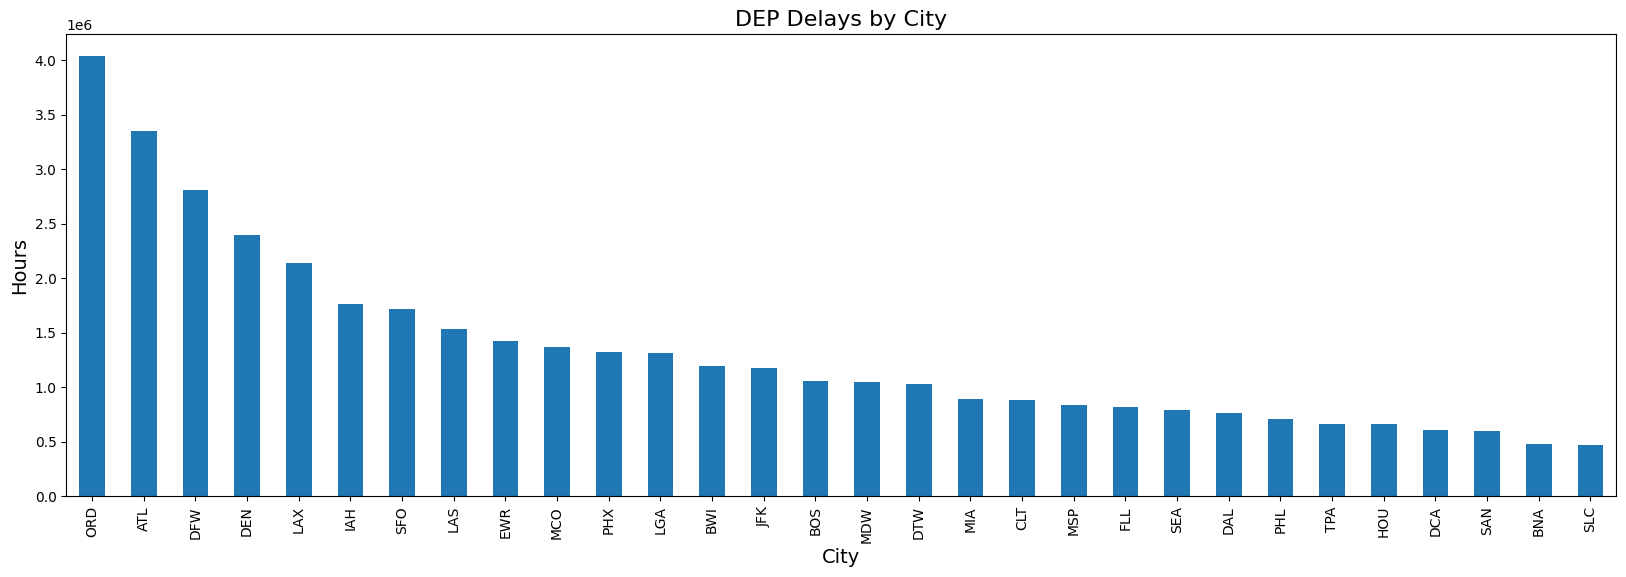

In [ ]:
city_by_delay = data.groupby('ORIGIN').DEP_DELAY.sum().sort_values(ascending=False)
plt.figure(figsize=(20, 6))
city_by_delay[:30].plot.bar()
plt.title('DEP Delays by City', fontsize=16)
plt.xlabel('City', fontsize=14)
plt.ylabel('Hours', fontsize=14)
plt.show()

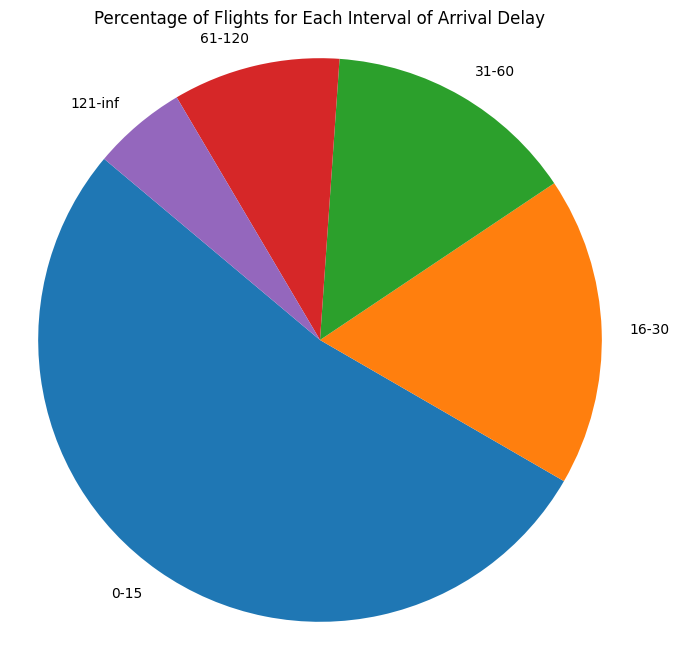

In [ ]:
# intervals for arrival delay
intervals = [(0, 15), (16, 30), (31, 60), (61, 120), (121, float('inf'))]

# arrival delay into intervals
data['Arrival_Delay_Interval'] = pd.cut(data['ARR_DELAY'], bins=[interval[0] for interval in intervals] + [float('inf')], labels=['{}-{}'.format(interval[0], interval[1]) for interval in intervals])

# flights in each interval
interval_counts = data['Arrival_Delay_Interval'].value_counts()
interval_percentages = (interval_counts / interval_counts.sum()) * 100

plt.figure(figsize=(8, 8))
plt.pie(interval_percentages, labels=interval_percentages.index, startangle=140)
plt.title('Percentage of Flights for Each Interval of Arrival Delay')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()


In [ ]:
# incoming and outgoing flights for each airport
incoming_flights = data.groupby('DEST')['DEST'].count()
outgoing_flights = data.groupby('ORIGIN')['ORIGIN'].count()

# Combining them
total_flights = incoming_flights.add(outgoing_flights, fill_value=0)
top_20_busiest_airports = total_flights.nlargest(20)

for airport in top_20_busiest_airports.index:
    incoming_count = incoming_flights.get(airport, 0)
    outgoing_count = outgoing_flights.get(airport, 0)
    print(f"AIRPORT: {airport}")
    print(f"Incoming Flights: {incoming_count}")
    print(f"Outgoing Flights: {outgoing_count}")
    print()


AIRPORT: ATL
Incoming Flights: 376746
Outgoing Flights: 376836

AIRPORT: ORD
Incoming Flights: 304164
Outgoing Flights: 304938

AIRPORT: DFW
Incoming Flights: 253437
Outgoing Flights: 253928

AIRPORT: DEN
Incoming Flights: 211783
Outgoing Flights: 212035

AIRPORT: LAX
Incoming Flights: 210098
Outgoing Flights: 210162

AIRPORT: SFO
Incoming Flights: 159757
Outgoing Flights: 159974

AIRPORT: PHX
Incoming Flights: 158497
Outgoing Flights: 158817

AIRPORT: IAH
Incoming Flights: 157390
Outgoing Flights: 157611

AIRPORT: LAS
Incoming Flights: 145013
Outgoing Flights: 144905

AIRPORT: MSP
Incoming Flights: 121876
Outgoing Flights: 121877

AIRPORT: SEA
Incoming Flights: 120727
Outgoing Flights: 120818

AIRPORT: MCO
Incoming Flights: 118921
Outgoing Flights: 118884

AIRPORT: DTW
Incoming Flights: 116962
Outgoing Flights: 117132

AIRPORT: BOS
Incoming Flights: 115297
Outgoing Flights: 115308

AIRPORT: CLT
Incoming Flights: 108521
Outgoing Flights: 108794

AIRPORT: EWR
Incoming Flights: 108044
Ou

In [ ]:
# EDA for relationship between departure delay and distance
plt.figure(figsize=(10, 6))
sns.scatterplot(x='DISTANCE', y='DEP_DELAY', data=data)
plt.title('Relationship between Distance and Departure Delay')
plt.xlabel('Distance (miles)')
plt.ylabel('Departure Delay (minutes)')
plt.show()


# EDA for departure delay over time (by date)
data['FL_DATE'] = pd.to_datetime(data['FL_DATE'])
plt.figure(figsize=(12, 6))
plt.plot(data['FL_DATE'], data['DEP_DELAY'], marker='o', linestyle='-')
plt.title('Departure Delay Over Time')
plt.xlabel('Date')
plt.ylabel('Departure Delay (minutes)')
plt.xticks(rotation=45)
plt.show()

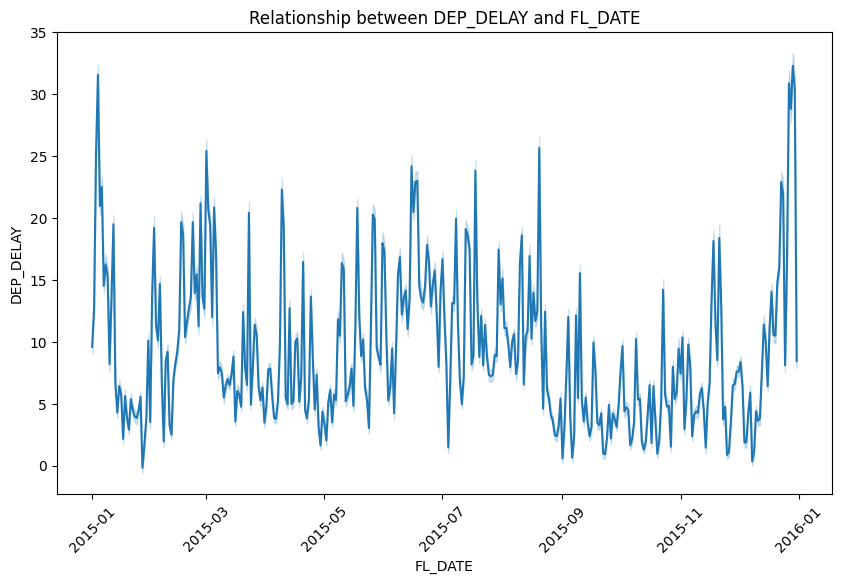

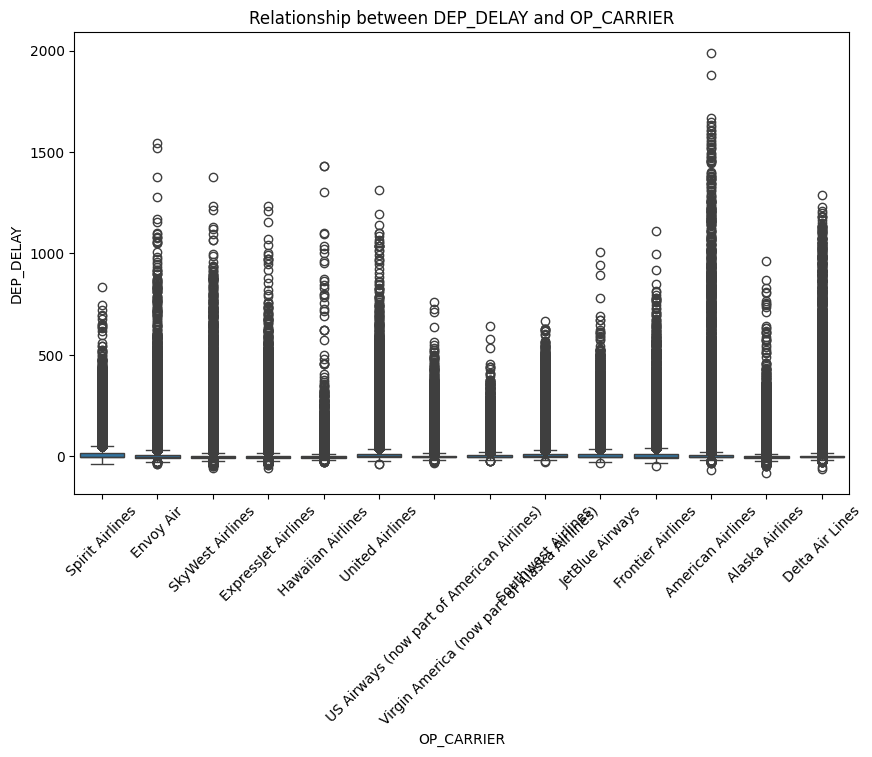

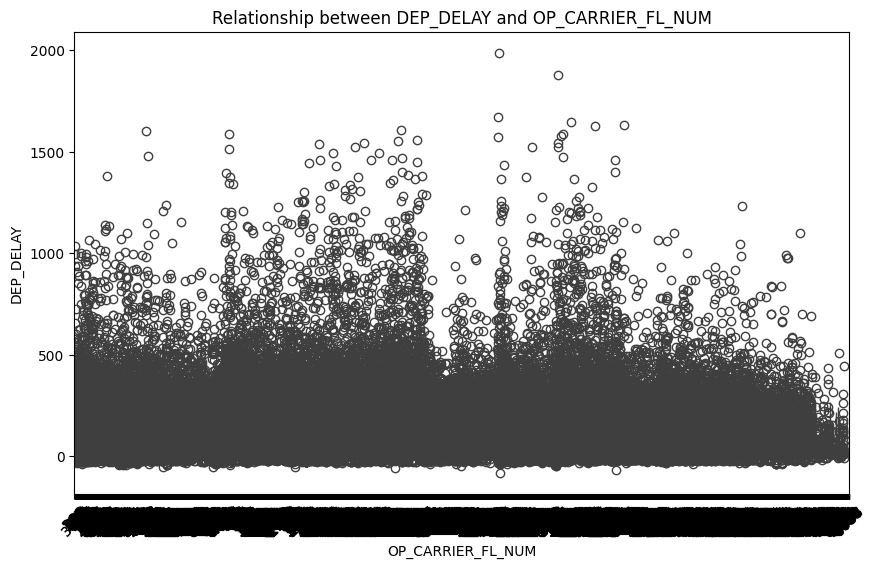

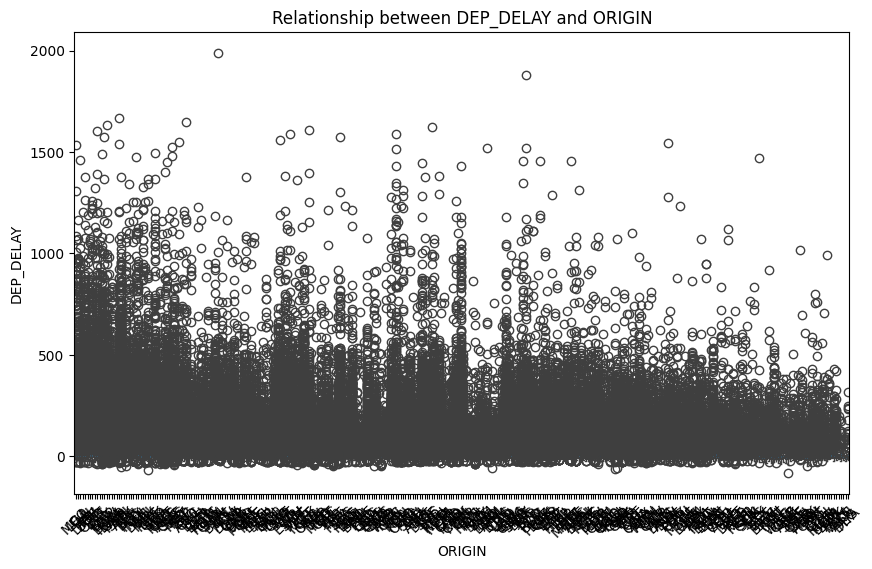

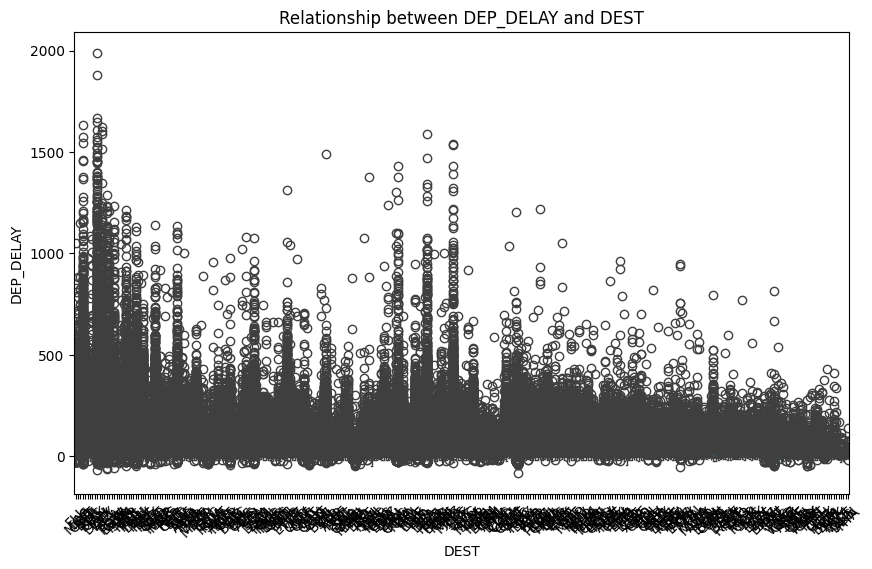

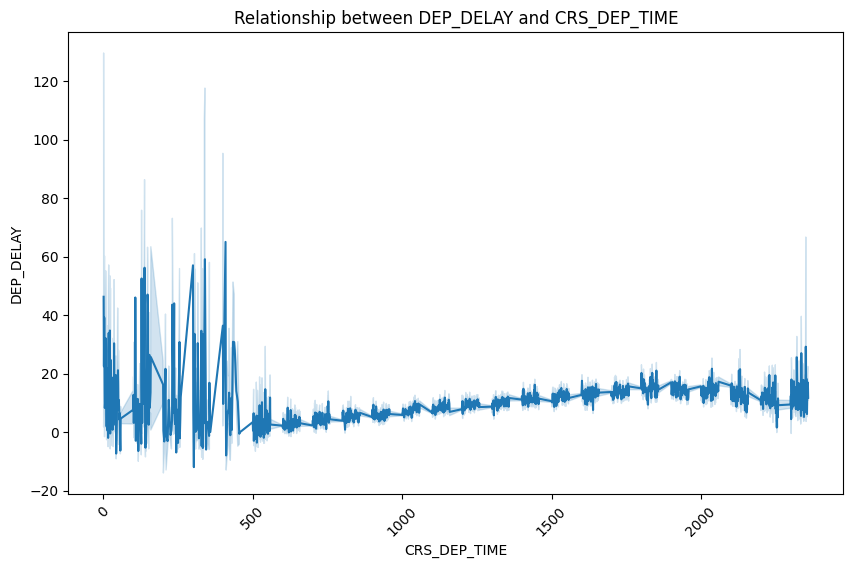

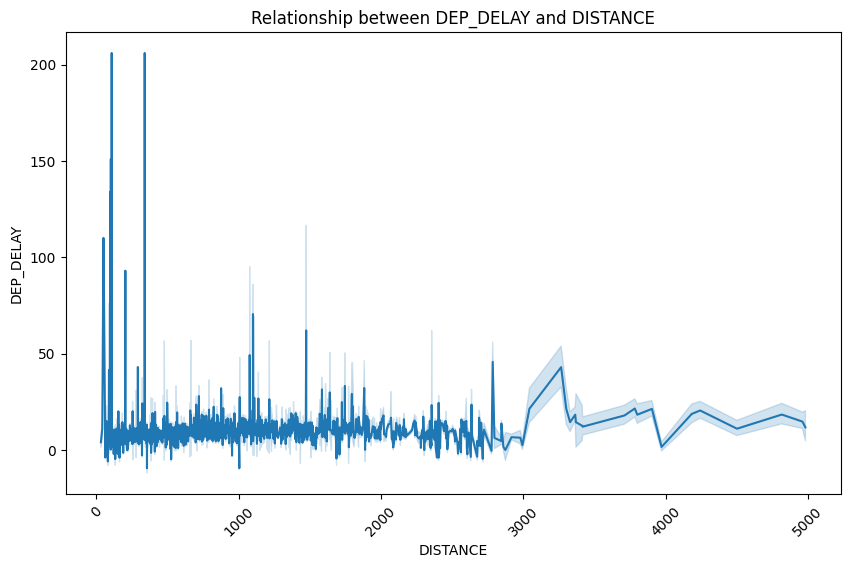

In [ ]:
features = ['FL_DATE', 'OP_CARRIER', 'OP_CARRIER_FL_NUM', 'ORIGIN', 'DEST', 'CRS_DEP_TIME', 'DISTANCE']


for feature in features:
    plt.figure(figsize=(10, 6))
    if data[feature].dtype == 'object':
        # Create box plot for categorical features
        sns.boxplot(x=data[feature], y=data['DEP_DELAY'])
    else:
        # Create scatter plot for numerical features
        sns.lineplot(x=data[feature], y=data['DEP_DELAY'])
    plt.title(f'Relationship between DEP_DELAY and {feature}')
    plt.xlabel(feature)
    plt.ylabel('DEP_DELAY')
    plt.xticks(rotation=45)
    plt.show()
